In [56]:
library(data.table)
library(ggplot2)
theme_set(theme_bw())


In [57]:
setwd('~/m/bacterial_dating/19_coherent_prediction_workflow')

In [58]:
system('ls -d data/*.predictions.csv> data/predictions_data_files.txt')
files = fread('data/predictions_data_files.txt', header=F)
d = files[,fread(V1), by=V1]
d[1:3]

V1,node,prediction,model,probability
<chr>,<chr>,<int>,<chr>,<dbl>
data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.predictions.csv,AABM5X1(0),1,data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.models/AdaBoostClassifier.model,0.5006118
data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.predictions.csv,AABM5X2(1),0,data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.models/AdaBoostClassifier.model,0.4635341
data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.predictions.csv,AABM5X3(2),0,data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.models/AdaBoostClassifier.model,0.4488755


In [59]:
d[, dataset := gsub('data/(.+).csv.predictions.csv', '\\1', V1)]
d[1:3]

V1,node,prediction,model,probability,dataset
<chr>,<chr>,<int>,<chr>,<dbl>,<chr>
data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.predictions.csv,AABM5X1(0),1,data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.models/AdaBoostClassifier.model,0.5006118,bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion
data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.predictions.csv,AABM5X2(1),0,data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.models/AdaBoostClassifier.model,0.4635341,bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion
data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.predictions.csv,AABM5X3(2),0,data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.models/AdaBoostClassifier.model,0.4488755,bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion


In [60]:
d[dataset == 'bacdive_scrape_20230315.json.parsed.anaerobe_vs_rest.with_cyanos', dataset2 := '1=anaerobe_vs_rest']
d[dataset == 'bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos', dataset2 := '2=anaerobe_vs_aerobe']
d[dataset == 'bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion', dataset2 := '3=anaerobe_vs_aerobe_resp_exclude']
d[dataset == 'bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_set_aerobic', dataset2 := '4=anaerobe_vs_aerobe_resp_aerobic']
d[dataset == 'bacdive_scrape_20230315.json.parsed.anaerobe_vs_rest.with_cyanos.apply_respiration_gene_exclusion', dataset2 := '5=anaerobe_vs_rest_resp_exclude']
d[dataset == 'bacdive_scrape_20230315.json.parsed.anaerobe_vs_rest.with_cyanos.apply_respiration_gene_set_aerobic', dataset2 := '6=anaerobe_vs_rest_resp_aerobic']
data.table(table(d$dataset2))


V1,N
<chr>,<int>
1=anaerobe_vs_rest,16104
2=anaerobe_vs_aerobe,16104
3=anaerobe_vs_aerobe_resp_exclude,16104
4=anaerobe_vs_aerobe_resp_aerobic,16104
5=anaerobe_vs_rest_resp_exclude,16104
6=anaerobe_vs_rest_resp_aerobic,16104


In [61]:
d[, predictor := gsub('.*/(.+).model', '\\1', model)]
d[1:3]

V1,node,prediction,model,probability,dataset,dataset2,predictor
<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.predictions.csv,AABM5X1(0),1,data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.models/AdaBoostClassifier.model,0.5006118,bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion,3=anaerobe_vs_aerobe_resp_exclude,AdaBoostClassifier
data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.predictions.csv,AABM5X2(1),0,data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.models/AdaBoostClassifier.model,0.4635341,bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion,3=anaerobe_vs_aerobe_resp_exclude,AdaBoostClassifier
data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.predictions.csv,AABM5X3(2),0,data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion.csv.models/AdaBoostClassifier.model,0.4488755,bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.apply_respiration_gene_exclusion,3=anaerobe_vs_aerobe_resp_exclude,AdaBoostClassifier


In [62]:
d[, V1 := NULL]
d[, dataset := NULL]
setnames(d, 'dataset2', 'dataset')
d[, model := NULL]
d[1:3]

node,prediction,probability,dataset,predictor
<chr>,<int>,<dbl>,<chr>,<chr>
AABM5X1(0),1,0.5006118,3=anaerobe_vs_aerobe_resp_exclude,AdaBoostClassifier
AABM5X2(1),0,0.4635341,3=anaerobe_vs_aerobe_resp_exclude,AdaBoostClassifier
AABM5X3(2),0,0.4488755,3=anaerobe_vs_aerobe_resp_exclude,AdaBoostClassifier


# Distributions of prediction probabilities

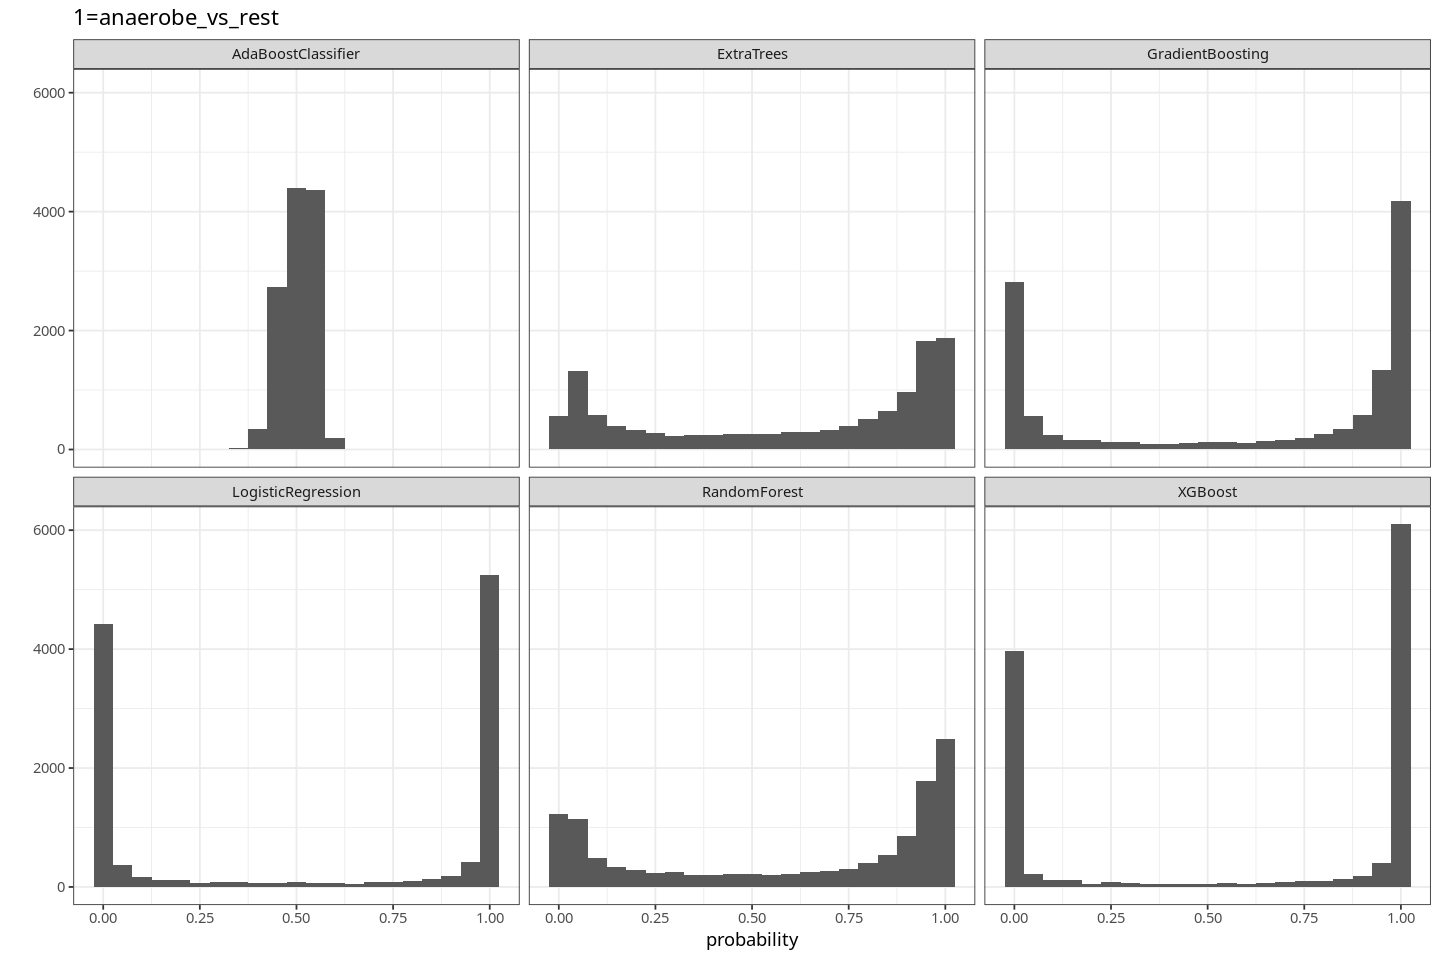

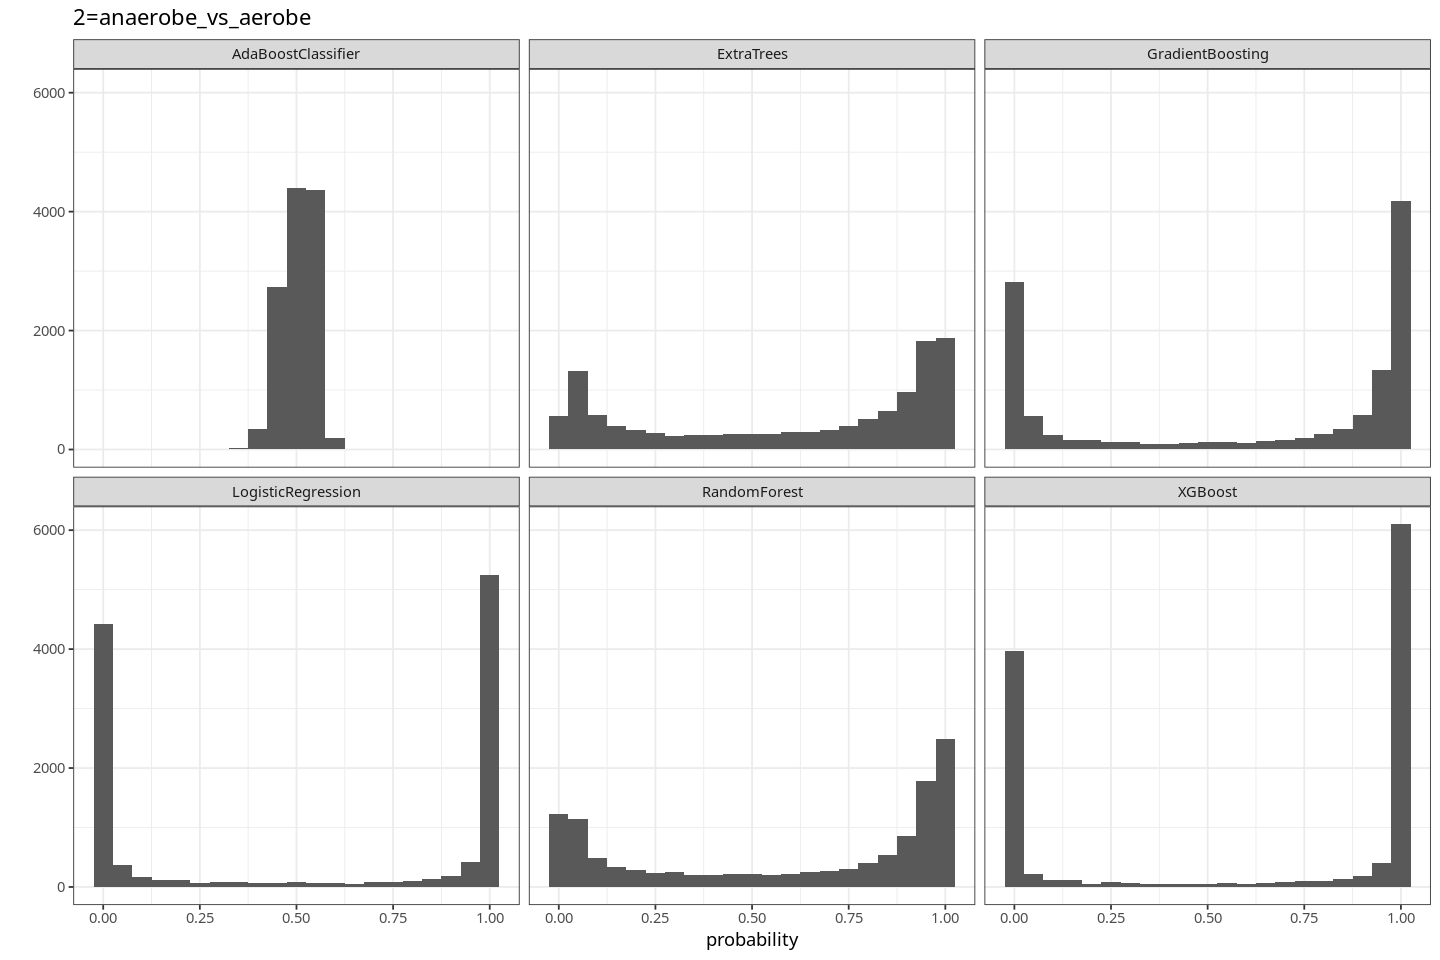

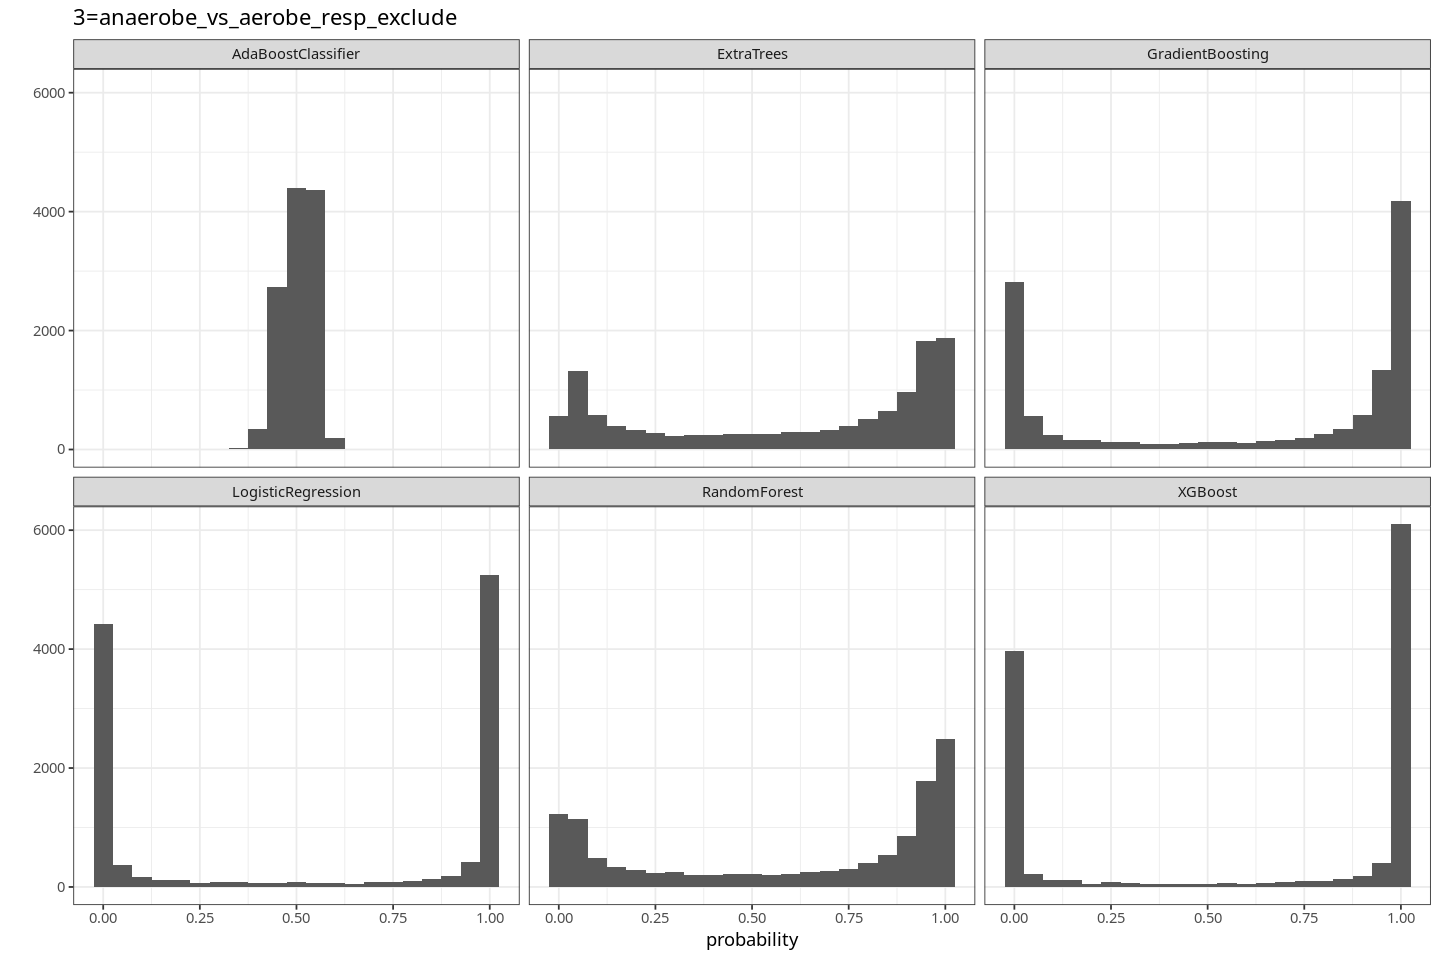

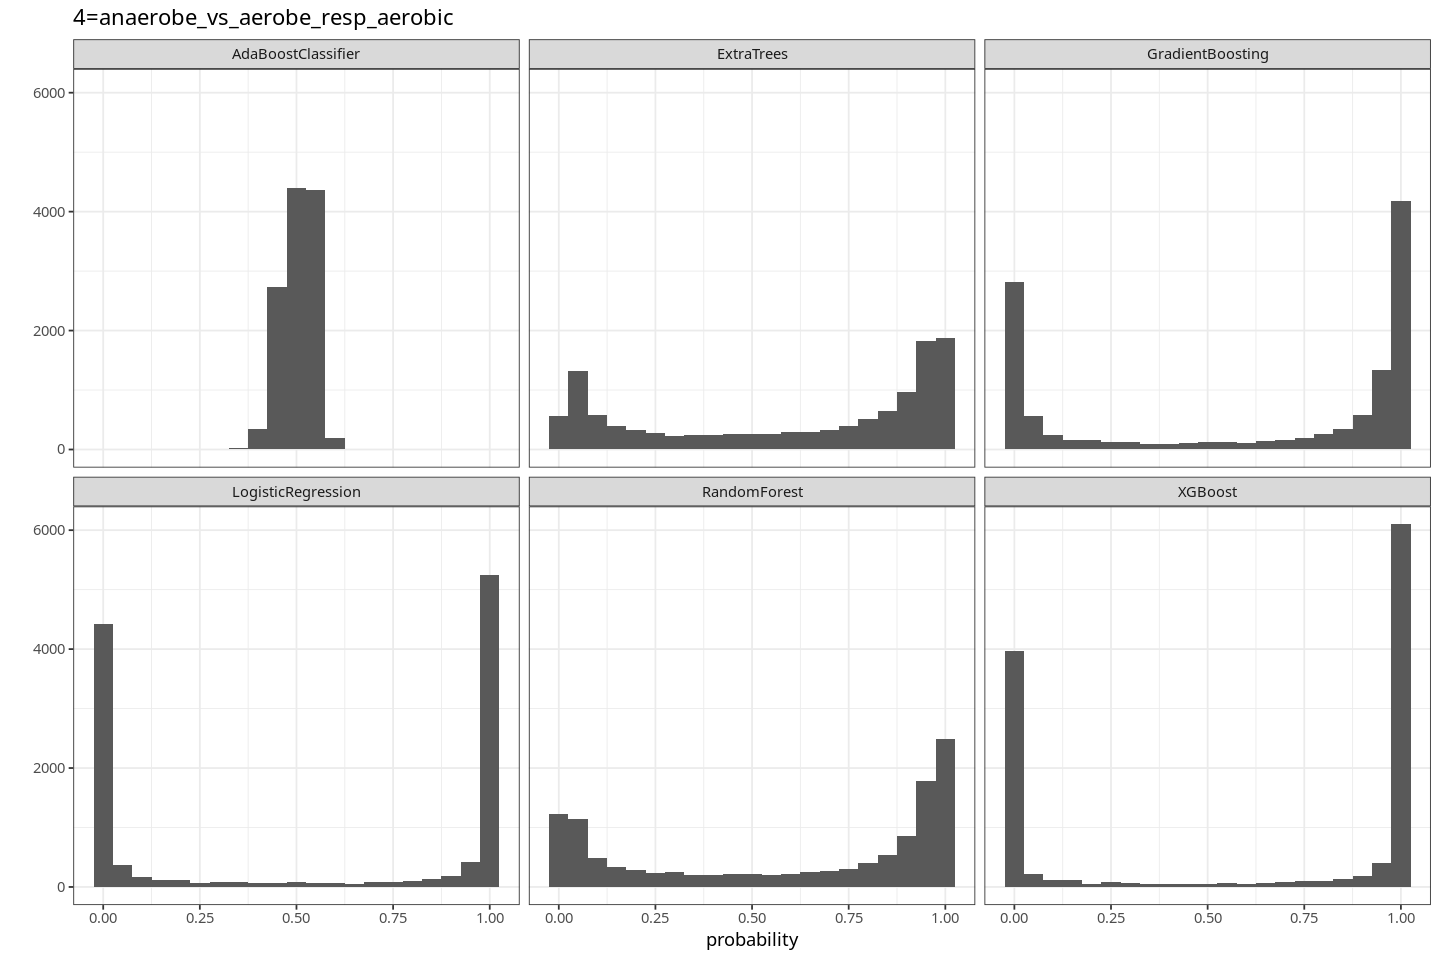

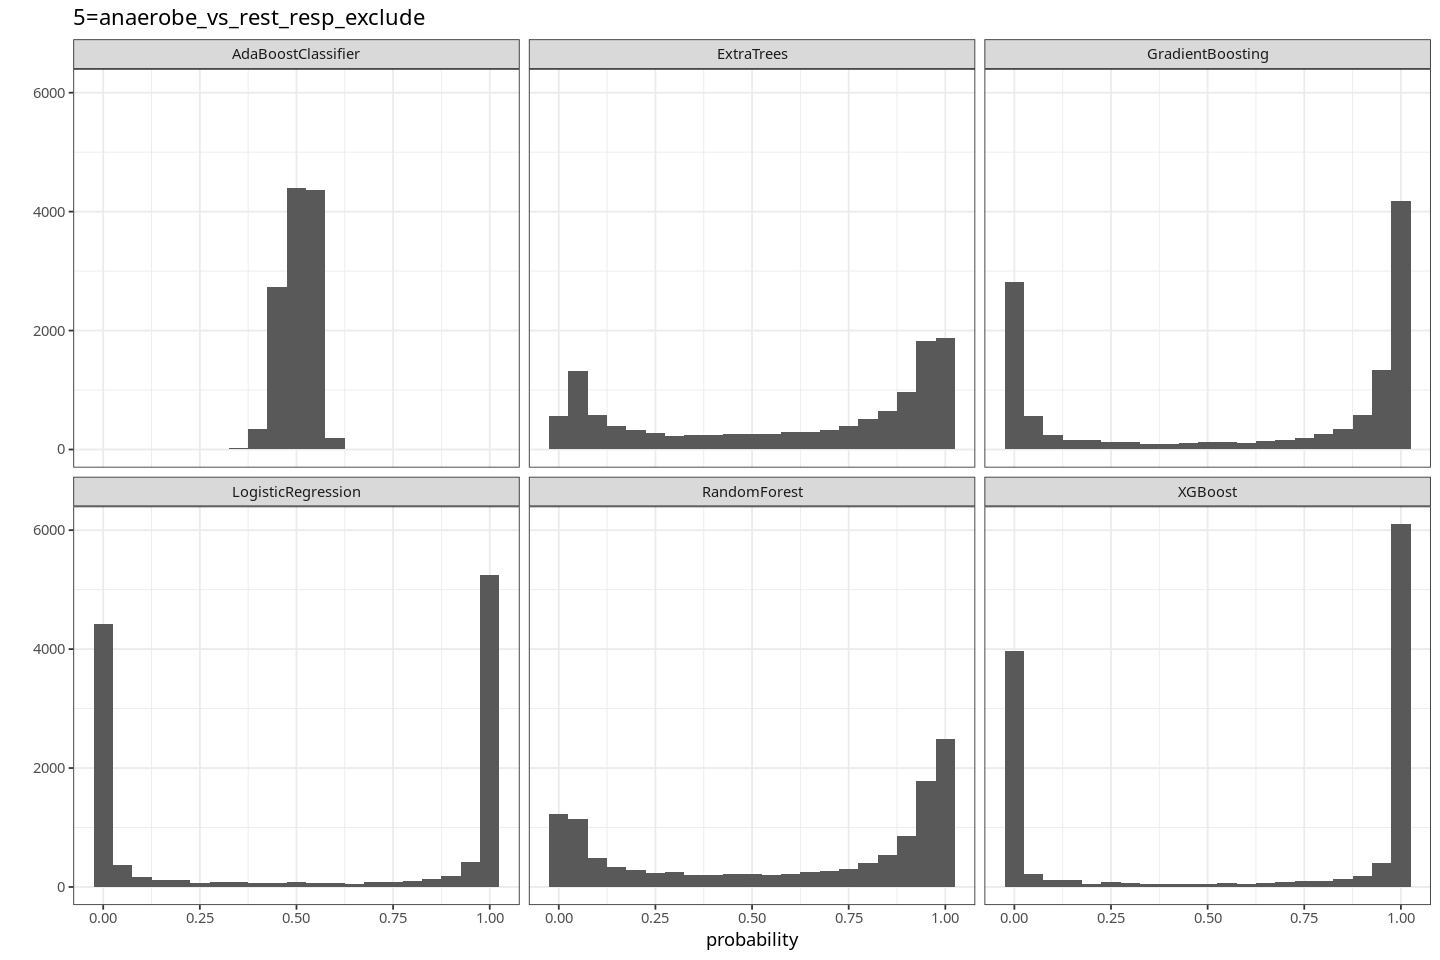

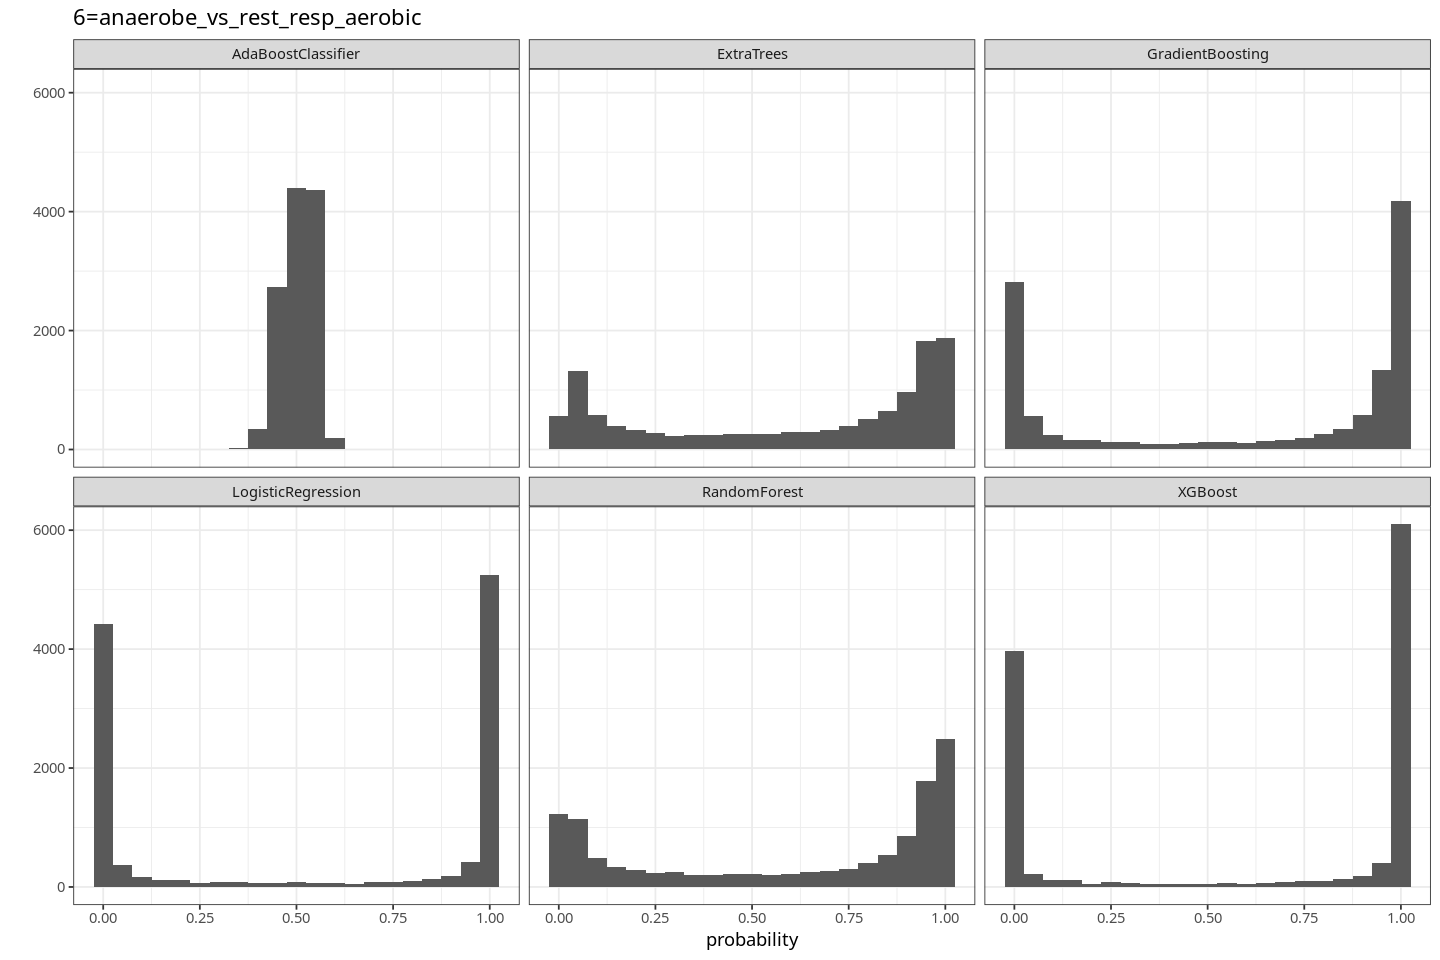

In [69]:
for (dataset_name in sort(unique(d$dataset))){
    print(qplot(data=d[!(predictor %in% c('GaussianNB','Perceptron'))], probability, binwidth=0.05, main=dataset_name)+facet_wrap(~predictor))
}